In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np 
import os 
import pandas as pd 
from typing import Tuple, List
from sklearn.cluster import KMeans
import pickle
from hmmlearn import hmm
import matplotlib.pyplot as plt

In [2]:
nRowsRead = None # specify 'None' if want to read whole file

df = pd.read_csv('../input/model_2015_ST4000DM000.csv', delimiter=',', nrows = nRowsRead)
directory = '../input/'

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df_ = pd.read_csv(file_path, delimiter=',', nrows = nRowsRead)
        df = pd.concat([df,df_[df_['failure'] == 1]],sort = False)

nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1372813 rows and 105 columns


In [3]:
df.head(5)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_177_normalized,smart_177_raw,smart_179_normalized,smart_179_raw,smart_181_normalized,smart_181_raw,smart_182_normalized,smart_182_raw,smart_235_normalized,smart_235_raw
0,2015-01-01,Z300YN6R,ST4000DM000,4000787030016,0,117.0,134283496.0,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,W300T09N,ST4000DM000,4000787030016,0,120.0,235812736.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,Z3025923,ST4000DM000,4000787030016,1,117.0,159417104.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,Z300GPJ7,ST4000DM000,4000787030016,0,110.0,25333728.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,Z300VALY,ST4000DM000,4000787030016,0,117.0,139107936.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_177_normalized,smart_177_raw,smart_179_normalized,smart_179_raw,smart_181_normalized,smart_181_raw,smart_182_normalized,smart_182_raw,smart_235_normalized,smart_235_raw
count,1.372813e+06,1.372813e+06,1.372810e+06,1.372810e+06,0.0,0.0,1.372810e+06,1372810.0,1.372810e+06,1.372810e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.000781e+12,1.251882e-01,1.152630e+02,1.211711e+08,NaN,NaN,9.461283e+01,0.0,1.000000e+02,8.149295e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.828971e+09,3.309323e-01,3.861582e+00,7.038826e+07,NaN,NaN,2.961386e+00,0.0,1.706964e-03,1.093317e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.000000e+00,0.000000e+00,8.600000e+01,0.000000e+00,NaN,NaN,9.100000e+01,0.0,9.900000e+01,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.000787e+12,0.000000e+00,1.140000e+02,5.952811e+07,NaN,NaN,9.200000e+01,0.0,1.000000e+02,3.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.000787e+12,0.000000e+00,1.170000e+02,1.203359e+08,NaN,NaN,9.400000e+01,0.0,1.000000e+02,6.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000787e+12,0.000000e+00,1.180000e+02,1.822052e+08,NaN,NaN,9.700000e+01,0.0,1.000000e+02,1.100000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.000787e+12,1.000000e+00,1.200000e+02,2.441401e+08,NaN,NaN,1.000000e+02,0.0,1.000000e+02,1.173000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372813 entries, 0 to 380005
Columns: 105 entries, date to smart_235_raw
dtypes: float64(100), int64(2), object(3)
memory usage: 1.1+ GB


In [6]:
df_cleaned = df.dropna(axis=1, how='all')
df_cleaned = df_cleaned.dropna(axis = 0, how = 'all')
df_cleaned.drop(list(df_cleaned.filter(regex = 'normalized')), axis = 1, inplace = True)
df_cleaned = df_cleaned[[i for i in df_cleaned if df_cleaned[i].nunique()>1]]
df_cleaned = df_cleaned[df_cleaned['serial_number'].str.startswith('S300') | df_cleaned['failure'] == 1]
df_cleaned.describe()

,capacity_bytes,failure,smart_1_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,smart_183_raw,smart_184_raw,...,smart_190_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
count,3.846770e+05,384677.000000,3.846750e+05,384675.000000,384675.000000,3.846750e+05,384675.000000,384675.000000,384675.000000,384675.000000,...,384675.000000,384675.000000,384675.000000,384675.000000,384675.000000,384675.000000,384675.000000,3.846750e+05,3.846750e+05,3.846750e+05
mean,4.000766e+12,0.446764,1.196448e+08,6.587652,53.590080,8.145677e+10,7767.288935,5.911104,2.337428,0.022052,...,25.606509,1.521360,25118.996574,25.606509,3.533383,3.533383,3.743571,1.987707e+13,1.636876e+10,6.002428e+10
std,9.122456e+09,0.497159,7.032770e+07,14.032310,836.238843,3.221413e+12,8140.522672,8.003042,107.008412,0.499234,...,4.978408,12.965802,33253.789141,4.978408,76.538286,76.538286,120.026011,5.769954e+13,8.644107e+09,8.022334e+10
min,-1.000000e+00,0.000000,0.000000e+00,1.000000,0.000000,2.826000e+03,8.000000,0.000000,0.000000,0.000000,...,14.000000,0.000000,3.000000,14.000000,0.000000,0.000000,0.000000,6.000000e+00,2.439200e+04,5.559800e+04
25%,4.000787e+12,0.000000,5.772178e+07,2.000000,0.000000,7.699331e+07,2168.000000,1.000000,0.000000,0.000000,...,22.000000,0.000000,5962.000000,22.000000,0.000000,0.000000,0.000000,1.998000e+03,1.122354e+10,1.360044e+09
50%,4.000787e+12,0.000000,1.175020e+08,4.000000,0.000000,1.405883e+08,3609.000000,3.000000,0.000000,0.000000,...,25.000000,0.000000,21458.000000,25.000000,0.000000,0.000000,0.000000,3.460000e+03,1.576782e+10,7.190960e+09
75%,4.000787e+12,1.000000,1.807580e+08,9.000000,0.000000,3.790138e+08,12346.000000,8.000000,0.000000,0.000000,...,29.000000,1.000000,34504.500000,29.000000,0.000000,0.000000,0.000000,1.858100e+04,2.071011e+10,1.124592e+11
max,4.000787e+12,1.000000,2.441397e+08,1173.000000,64720.000000,2.814717e+14,41284.000000,277.000000,6032.000000,40.000000,...,141.000000,1167.000000,647477.000000,141.000000,15664.000000,15664.000000,5415.000000,2.814707e+14,5.855064e+10,4.253253e+11


In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384677 entries, 2 to 380005
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            384677 non-null  object 
 1   serial_number   384677 non-null  object 
 2   capacity_bytes  384677 non-null  int64  
 3   failure         384677 non-null  int64  
 4   smart_1_raw     384675 non-null  float64
 5   smart_4_raw     384675 non-null  float64
 6   smart_5_raw     384675 non-null  float64
 7   smart_7_raw     384675 non-null  float64
 8   smart_9_raw     384675 non-null  float64
 9   smart_12_raw    384675 non-null  float64
 10  smart_183_raw   384675 non-null  float64
 11  smart_184_raw   384675 non-null  float64
 12  smart_187_raw   384675 non-null  float64
 13  smart_188_raw   384675 non-null  float64
 14  smart_189_raw   384675 non-null  float64
 15  smart_190_raw   384675 non-null  float64
 16  smart_192_raw   384675 non-null  float64
 17  smart_193_raw  

In [8]:
df_cleaned.head()

,date,serial_number,capacity_bytes,failure,smart_1_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,...,smart_190_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
2,2015-01-01,Z3025923,4000787030016,1,159417104.0,1.0,0.0,86152902.0,1350.0,1.0,...,21.0,0.0,17.0,21.0,0.0,0.0,0.0,1.350000e+03,8.734935e+09,2.309538e+10
10,2015-01-01,Z300H4MD,4000787030016,1,137885800.0,5.0,0.0,186730433.0,2528.0,5.0,...,25.0,1.0,558.0,25.0,0.0,0.0,0.0,2.204950e+14,9.932069e+09,3.825336e+10
18,2015-01-01,S30070M5,4000787030016,0,115838280.0,3.0,0.0,566752837.0,6560.0,3.0,...,26.0,1.0,5591.0,26.0,0.0,0.0,0.0,2.459685e+14,1.492910e+10,4.424763e+10
24,2015-01-02,Z3025923,4000787030016,1,98966640.0,1.0,0.0,88003789.0,1374.0,1.0,...,21.0,0.0,17.0,21.0,0.0,0.0,0.0,1.373000e+03,8.835475e+09,2.370330e+10
38,2015-01-02,Z300H4MD,4000787030016,1,209399680.0,5.0,0.0,188670210.0,2552.0,5.0,...,25.0,1.0,558.0,25.0,0.0,0.0,0.0,3.706557e+12,9.956712e+09,3.855307e+10


In [9]:
df_cleaned = df_cleaned.drop(columns=['capacity_bytes'])
df_cleaned = df_cleaned[[i for i in df_cleaned if df_cleaned[i].nunique()>1]]
df_cleaned = df_cleaned.dropna(axis = 0, how = 'any')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384675 entries, 2 to 380005
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           384675 non-null  object 
 1   serial_number  384675 non-null  object 
 2   failure        384675 non-null  int64  
 3   smart_1_raw    384675 non-null  float64
 4   smart_4_raw    384675 non-null  float64
 5   smart_5_raw    384675 non-null  float64
 6   smart_7_raw    384675 non-null  float64
 7   smart_9_raw    384675 non-null  float64
 8   smart_12_raw   384675 non-null  float64
 9   smart_183_raw  384675 non-null  float64
 10  smart_184_raw  384675 non-null  float64
 11  smart_187_raw  384675 non-null  float64
 12  smart_188_raw  384675 non-null  float64
 13  smart_189_raw  384675 non-null  float64
 14  smart_190_raw  384675 non-null  float64
 15  smart_192_raw  384675 non-null  float64
 16  smart_193_raw  384675 non-null  float64
 17  smart_194_raw  384675 non-null  fl

In [10]:
for key in df_cleaned.loc[:,'smart_1_raw':].columns:
    num_clusters = 10
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
    cluster_labels = kmeans.fit_predict(df_cleaned[key].to_numpy().reshape(-1,1))
    df_cleaned[key] = cluster_labels

In [11]:
group = df_cleaned.groupby('serial_number')
group.size()

serial_number
S3000FZ5    121
S3000QAP    121
S3002DLG    120
S3002HH0    121
S30034E6    121
           ... 
Z305Q0J8    120
Z3066LL9     32
Z306B7ZJ     47
Z306MW5B     25
Z307G464     21
Length: 3238, dtype: int64

In [12]:
failure_df = group.filter(lambda x : x['failure'].sum() > 0)
success_df = group.filter(lambda x : x['failure'].sum() <= 0)

In [13]:
def split_dataset(df: pd.DataFrame, test_size: int = None, train_size: int = None, key: str = 'serial_number')  -> Tuple[pd.DataFrame, pd.DataFrame]:
    keys_set = df[key].unique()
    if test_size == None or train_size == None:
        keys_train, keys_test = train_test_split(keys_set)
    else:
        keys_train, keys_test = train_test_split(keys_set,test_size = test_size, train_size = train_size)
    df_train, df_test = df[df[key].isin(keys_train)], df[df[key].isin(keys_test)]
    df_train = df_train.sort_values(by='date')
    df_test = df_test.sort_values(by='date')
    return df_train, df_test

In [14]:
def group_to_hmminput(df : pd.DataFrame) -> Tuple[dict[str,np.ndarray],List[int]]:
    df = df.sort_values(by = ['serial_number','date'])
    grouped = df.groupby('serial_number')
    sequence = dict(zip(df.loc[:,'smart_1_raw':].columns,[df[col].to_numpy(dtype = 'uint32').reshape(-1,1) for col in df.loc[:,'smart_1_raw':].columns]))
    lengths = list(grouped.size().values)
            
    return sequence, lengths

In [15]:
failure_train, failure_test = split_dataset(failure_df)
failure_train, failure_train_len = group_to_hmminput(failure_train)
failure_test, failure_test_len = group_to_hmminput(failure_test)

In [16]:
success_train, success_test = split_dataset(success_df,len(failure_test_len),len(failure_train_len))
success_train, success_train_len = group_to_hmminput(success_train)
success_test, success_test_len = group_to_hmminput(success_test)

In [17]:
def model_save(model_dict : dict, model_type : str) -> None:
    save_path = f"../models/{model_type[0].upper() + model_type[1:]}"
    for attr_name, model in model_dict.items():
        filename = f"{save_path}/{attr_name}.pkl"
        with open(filename, "wb") as file:
            pickle.dump(model, file)

In [18]:
model1 = {}
for attr in failure_train.keys():
    model1[attr] = hmm.CategoricalHMM(n_components = 5, n_features = 10, n_iter = 3)
    model1[attr].fit(failure_train[attr],failure_train_len)

In [19]:
model2 = {}
for attr in success_train.keys():
    model2[attr] = hmm.CategoricalHMM(n_components = 5, n_features = 10, n_iter = 3)
    model2[attr].fit(success_train[attr],success_train_len)

In [20]:
def split_concatenated_arrays(concatenated_dict : dict, lengths : List[int]):
    original_dict = {}
    for key,concatenated_list in concatenated_dict.items():
        original_arrays = []
        start = 0
        for length in lengths:
            end = start + length
            new_list = concatenated_list[start:end]
            original_arrays.append(new_list)
            start = end
        original_dict[key] = original_arrays
    return original_dict

In [21]:
failure_testset = split_concatenated_arrays(failure_test,failure_test_len)

In [22]:
success_testset = split_concatenated_arrays(success_test,success_test_len)

In [23]:
true_label = [1]*len(failure_test_len)+[0]*len(failure_test_len) #Full Dataset

In [24]:
def test_model(testset, lengths) -> List[int]:
    pred_label = []
    for i in range(len(lengths)):
        scores = {}
        for key in testset:
            scores[key] = model1[key].score(testset[key][i]) - model2[key].score(testset[key][i])
        if np.average(np.array(list(scores.values()))) > 0 :
            pred_label.append(1)
        else : 
            pred_label.append(0)
    return pred_label
        # if(abs(min(scores.values())) > max(scores.values())):
        #     pred_label.append(0)
        # else :
        #     pred_label.append(1)

In [25]:
fail_test = test_model(failure_testset, failure_test_len)
success_test = test_model(success_testset, success_test_len[:len(failure_test_len)])
pred_label = fail_test + success_test

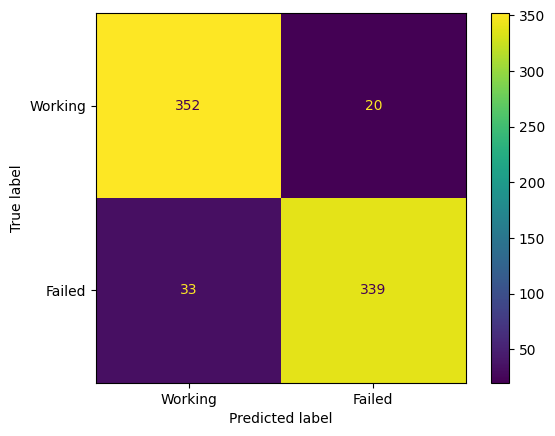

In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
conf = confusion_matrix(true_label , pred_label)
ConfusionMatrixDisplay(
conf,display_labels = ['Working','Failed']
).plot()

In [27]:
print(classification_report(true_label , pred_label))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       372
           1       0.94      0.91      0.93       372

    accuracy                           0.93       744
   macro avg       0.93      0.93      0.93       744
weighted avg       0.93      0.93      0.93       744

